# CocaCola

## Visualisation

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Forecasting

10-02-2022  00:06    <DIR>          .
09-02-2022  04:44    <DIR>          ..
09-02-2022  23:58    <DIR>          .ipynb_checkpoints
09-02-2022  04:44             9,559 Airlines+Data.xlsx
09-02-2022  23:58           365,579 CocaCola.ipynb
09-02-2022  04:44             9,422 CocaCola_Sales_Rawdata.xlsx
09-02-2022  04:43               233 Problem_statement.txt
10-02-2022  00:06            50,540 Untitled.ipynb
               5 File(s)        435,333 bytes
               3 Dir(s)  208,018,604,032 bytes free


In [64]:
cocacola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [65]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### Line Plot

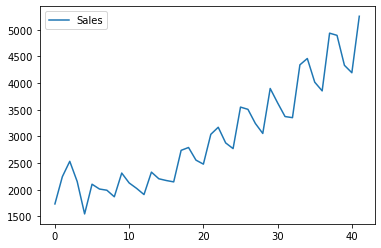

In [66]:
cocacola.plot()
plt.show()

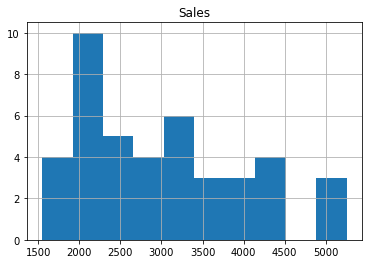

In [67]:
cocacola.hist()
plt.show()

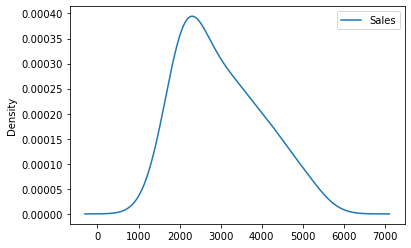

In [68]:
cocacola.plot(kind = 'kde')
plt.show()

### Lag Plot

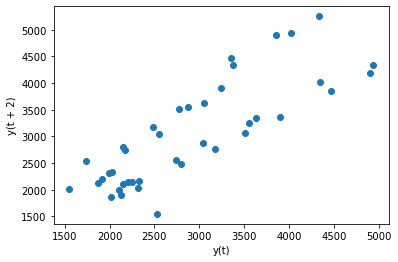

In [8]:
from pandas.plotting import lag_plot
lag_plot(cocacola.Sales, lag = 2)
plt.show()

### ACF and PACF Plots

C:\Users\shand\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


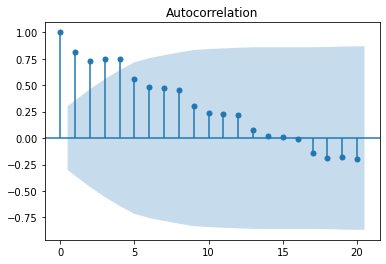

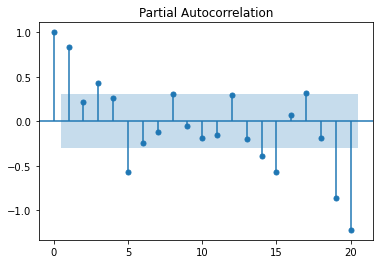

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(cocacola.Sales, lags = 20)
tsa_plots.plot_pacf(cocacola.Sales, lags = 20)
plt.show()

### Time Series Decomposition Plot

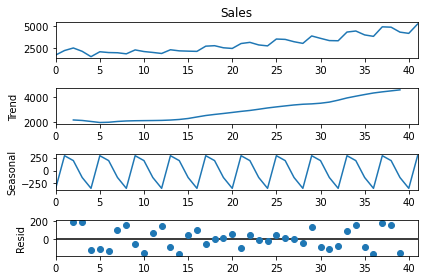

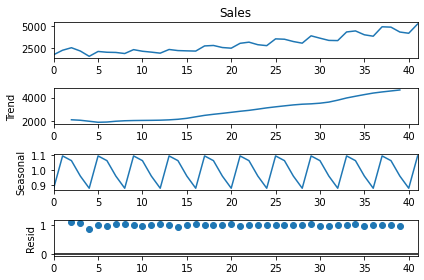

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(cocacola.Sales, period = 4, model = 'additive')
decompose_ts_add.plot()
plt.show()
decompose_ts_mul = seasonal_decompose(cocacola.Sales, period = 4, model = 'mul')
decompose_ts_mul.plot()
plt.show()

### Moving Average

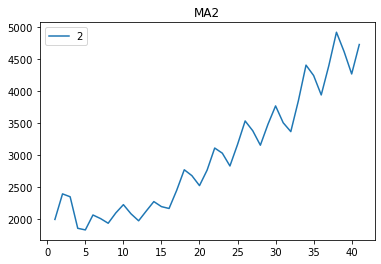

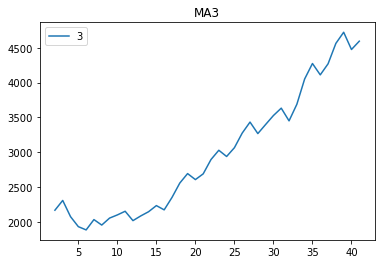

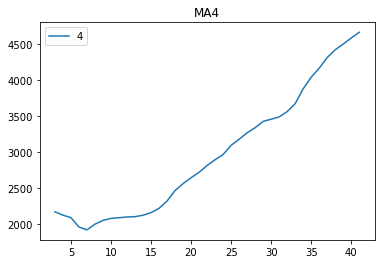

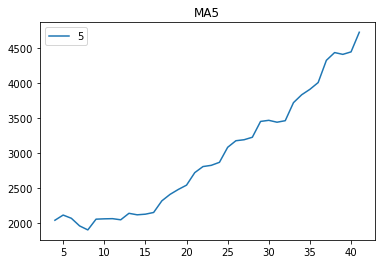

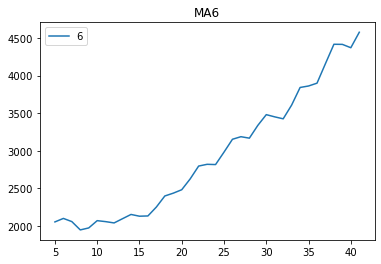

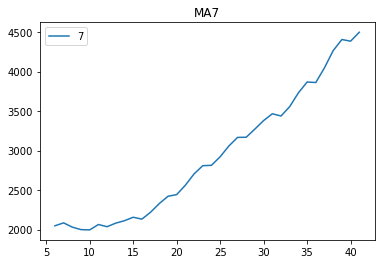

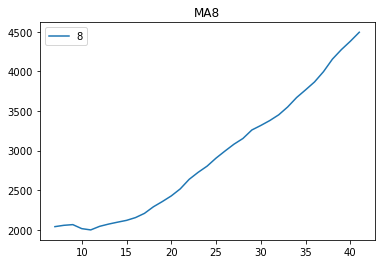

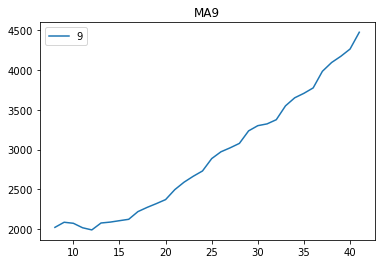

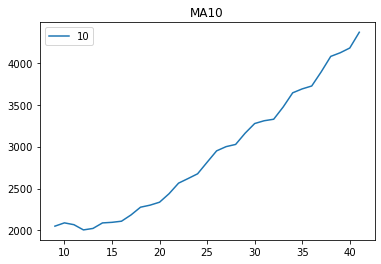

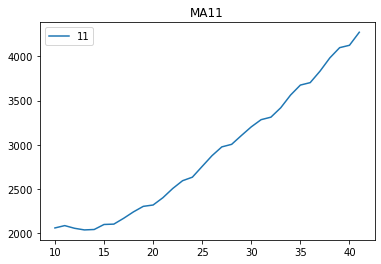

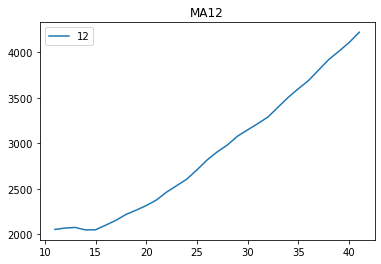

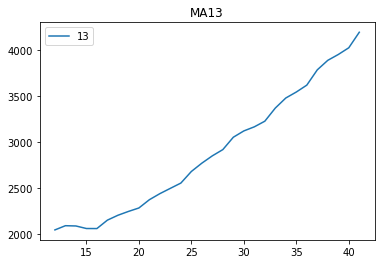

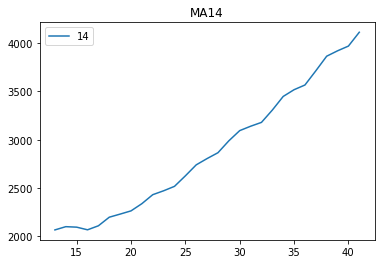

In [71]:
#cocacola.Sales.plot(label = 'org')
for i in range(2,15):
    cocacola.Sales.rolling(i).mean().plot(label = str(i))
    plt.title('MA' + str(i))
    plt.legend(loc = 'best')
    plt.show()

## Data Driven Models

In [46]:
#MAPE Score
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [47]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [48]:
train = cocacola.head(37)
test = cocacola.tail(5)

### Simple Exponential Method

In [51]:
ses_model = SimpleExpSmoothing(train.Sales).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
rmse_ses = np.sqrt(mean_squared_error(test.Sales,pred_ses))
print('RMSE =', rmse_ses, 'MAPE =', MAPE(pred_ses,test.Sales))

RMSE = 1011.7227757563887 MAPE = 19.127275540604103


C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Holt Method

In [53]:
hw_model = Holt(train.Sales).fit(smoothing_level = 0.8, smoothing_trend = 0.2)
pred_hw = hw_model.predict(start = test.index[0], end = test.index[-1])
rmse_hw = np.sqrt(mean_squared_error(test.Sales,pred_hw))
print('RMSE =', rmse_hw, 'MAPE =', MAPE(pred_hw,test.Sales))

RMSE = 809.7113513323292 MAPE = 14.28606271506533


C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Holt Winter exponential smoothing with additive seasonality and additive trend

In [55]:
hwe_model_add_add = ExponentialSmoothing(train.Sales, seasonal = 'add', trend = 'add', seasonal_periods = 4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0], end = test.index[-1])
rmse_hwe_add_add = np.sqrt(mean_squared_error(test.Sales,pred_hwe_add_add))
print('RMSE =', rmse_hwe_add_add, 'MAPE =', MAPE(pred_hwe_add_add,test.Sales))

RMSE = 203.6401977915473 MAPE = 3.8178491844806275


### Holt Winter exponetial smoothing with multiplicative seasonality and additive trend

In [57]:
hwe_model_mul_add = ExponentialSmoothing(train.Sales, seasonal = 'mul', trend = 'add', seasonal_periods = 4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0], end = test.index[-1])
rmse_hwe_mul_add = np.sqrt(mean_squared_error(test.Sales,pred_hwe_mul_add))
print('RMSE =', rmse_hwe_mul_add, 'MAPE =', MAPE(pred_hwe_mul_add,test.Sales))

RMSE = 146.50800544041283 MAPE = 2.423977170959238


C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


## Final Model by combining train and test

In [59]:
hwe_model_mul_add = ExponentialSmoothing(cocacola.Sales, seasonal = 'mul', trend = 'add', seasonal_periods = 4).fit()

C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [61]:
hwe_model_mul_add.forecast(10)

42    5241.469305
43    4670.636355
44    4507.705962
45    5752.140795
46    5648.703044
47    5026.605256
48    4844.833768
49    6174.442995
50    6055.936782
51    5382.574157
dtype: float64